# Job 2 - Results analysis

In [26]:
import os
import pathlib

projectDir = str(pathlib.Path(os.getcwd()).parent.parent.parent)

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

CSV_FILE = f"{projectDir}/full-output/job2-results.csv"

# Load csv data
df = pd.read_csv(CSV_FILE)

df['year'] = df['year'].astype(int)
df['avg_rating'] = df['avg_rating'].astype(float)
price_mapping = {
    '*': 'Low',
    '**': 'Medium',
    '***': 'High',
    '****': 'Premium',
}
df['price'] = df['price']#.replace(price_mapping)

### 1. HEATMAP: States vs Prices


Dropdown(description='Category:', index=36, options=('ATM', 'ATV dealer', 'ATV repair shop', 'Abrasives suppli…

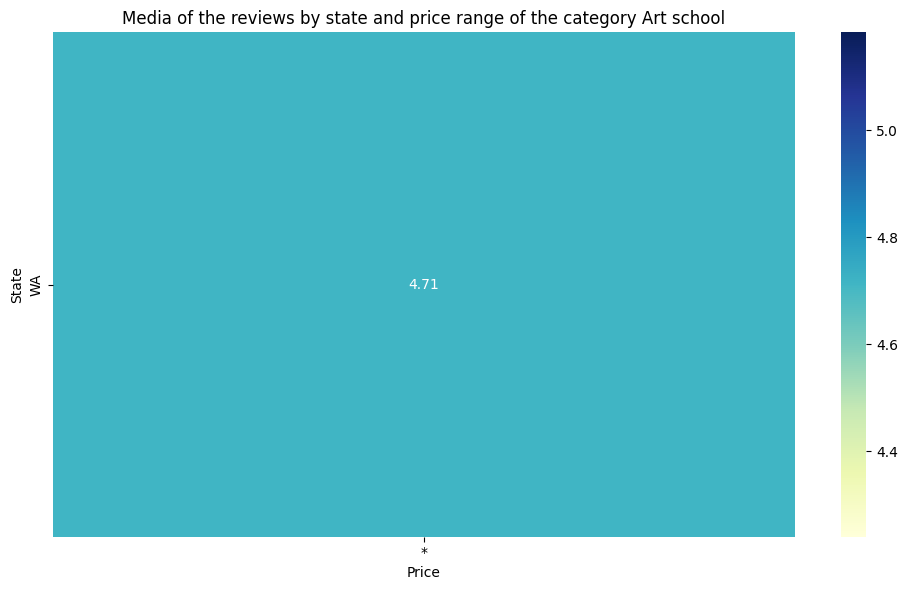

In [28]:
import ipywidgets as widgets
from IPython.display import display, clear_output

heatmap_dropdown = widgets.Dropdown(
    options=df['category'].sort_values().unique().tolist(),
    description='Category:'
)

def update_heatmap(category):
  clear_output(wait=True)
  display(heatmap_dropdown)
  plt.figure(figsize=(10, 6))
  cat_df = df[df['category'] == category]
  heatmap_data = cat_df.groupby(['state', 'price'])['avg_rating'].mean().unstack()
  sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
  plt.title(f'Media of the reviews by state and price range of the category {category}')
  plt.xlabel('Price')
  plt.ylabel('State')
  plt.tight_layout()
  plt.show()

heatmap_dropdown.observe(lambda change: update_heatmap(change['new']), names='value')
update_heatmap(heatmap_dropdown.value)

### 2. Temporal trend of categories

In [29]:

from IPython.display import display, clear_output

categories = sorted(df['category'].unique())

multi_select = widgets.SelectMultiple(
    options=categories,
    value=[categories[0]],  # valore iniziale selezionato
    description='Categorie',
    rows=10,
    disabled=False
)

output = widgets.Output()

def plot_categories(change):
    with output:
        clear_output(wait=True)
        selected = list(change['new'])
        if not selected:
            return
        
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=df[df['category'].isin(selected)], x='year', y='avg_rating', hue='category')
        plt.title(f'Temporal trend of the average assessments for selected categories')
        plt.ylabel('Average Rating')
        plt.xlabel('Year')
        plt.xticks(rotation=45)
        plt.legend(title='Category', loc='lower left')
        plt.tight_layout()
        plt.show()

multi_select.observe(plot_categories, names='value')

display(multi_select)
plot_categories({'new': multi_select.value})
display(output)


SelectMultiple(description='Categorie', index=(0,), options=('ATM', 'ATV dealer', 'ATV repair shop', 'Abrasive…

Output()

### 3. CHOROPLETH MAP: Average Rating by State
Shows in which state of the USA the selected business category has the highest average reviews.

In [30]:
import ipywidgets as widgets
from IPython.display import display, clear_output

chmap_dropdown = widgets.Dropdown(
    options=df['category'].sort_values().unique().tolist(),
    description='Category:'
)

def update_choroplethmap(category):
    clear_output(wait=True)
    display(chmap_dropdown)
    cat_df = df[df['category'] == category]
    state_avg = cat_df.groupby(['state'], as_index=False)['avg_rating'].mean()
    fig = px.choropleth(
        state_avg,
        locations='state',
        locationmode='USA-states',
        color='avg_rating',
        color_continuous_scale='RdYlGn',
        scope='usa',
        title='Average evaluation by state'
    )
    fig.show()

chmap_dropdown.observe(lambda change: update_choroplethmap(change['new']), names='value')
update_choroplethmap(chmap_dropdown.value)

Dropdown(description='Category:', index=87, options=('ATM', 'ATV dealer', 'ATV repair shop', 'Abrasives suppli…